<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx

# Part I

In [2]:
n_v, n_e = 100, 200
G = nx.dense_gnm_random_graph(n_v, n_e)

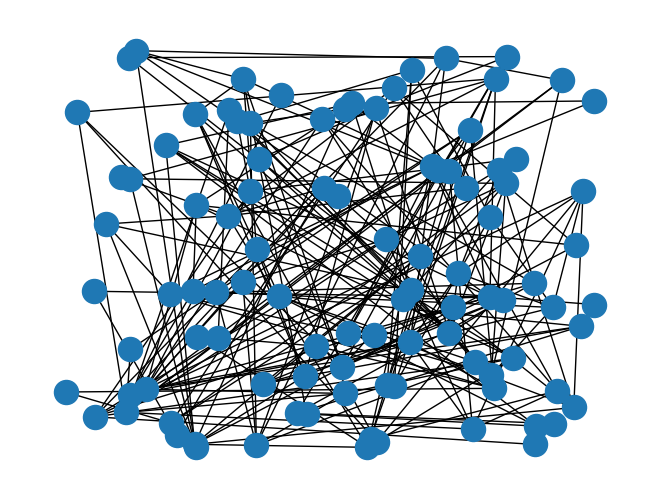

In [3]:
nx.draw(G, pos=nx.random_layout(G))

In [4]:
adj_matrix = nx.adjacency_matrix(G).todense()
adj_matrix = pd.DataFrame(adj_matrix)
print(adj_matrix.head())

   0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   1   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   

   97  98  99  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 100 columns]


In [5]:
adj_list = [[j for j in range(len(adj_matrix)) if adj_matrix[i][j] == 1] for i in range(len(adj_matrix))]
print(pd.Series(adj_list).head())

0                [29, 56, 57, 62]
1             [8, 33, 62, 82, 96]
2            [40, 66, 80, 81, 83]
3    [18, 23, 24, 25, 57, 59, 76]
4                 [5, 17, 30, 72]
dtype: object


# Part II

## Finding connected components of the graph

In [6]:
def getComponents(G : nx.Graph):
    def DFS(i):
        visited[i] = True
        components[i] = component_index
        for j in adj_list[i]:
            if not visited[j]:
                DFS(j)

    n = G.number_of_nodes()
    visited = [False] * n
    components = np.empty(n)
    component_index = 0

    for i in range(n):
        if not visited[i]:
            DFS(i)
            component_index += 1
    return component_index, components.astype(np.int64)

In [7]:
n_cc, cc = getComponents(G)

components = [[] for _ in range(n_cc)]
for i, val in enumerate(cc):
    components[val].append(i)

print('Number of connected components:', n_cc)
print('Connected components:', components)

Number of connected components: 2
Connected components: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], [38]]


## Finding a shortest path between two random vertices

In [8]:
def BFS(adj, src, dest, v, pred, dist):
    queue = []
    visited = [False for i in range(v)];

    for i in range(v):
        dist[i] = 1000000
        pred[i] = -1;

    visited[src] = True;
    dist[src] = 0;
    queue.append(src);

    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):

            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);

                if (adj[u][i] == dest):
                    return True;

    return False;

In [9]:
def printShortestDistance(adj, s, dest, v):
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];

    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")
        return

    path = []
    crawl = dest;
    path.append(crawl);

    while (pred[crawl] != -1):
        path.append(pred[crawl]);
        crawl = pred[crawl];

    print('Start:', s, 'End:', dest)
    print("Path:", path[::-1])

In [10]:
start, end = np.random.randint(n_v, size = 2)

printShortestDistance(adj_list, start, end, n_v)

Start: 39 End: 68
Path: [39, 12, 64, 40, 99, 68]
